# Clustering KMeans

Dataset: countries

In [4]:
import seaborn as sns
%matplotlib inline
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
sns.set()

Explorar un dataset de países y detectar similitudes utilizando clustering

## Carga de datos

In [5]:
df = pd.read_csv("../../../CURSO_ANALISIS_BD2/data/varios/countries.csv")
df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


In [6]:
df.shape

(227, 20)

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Population,227.0,2.874028e+07,1.178913e+08,7026.000,437624.00000,4786994.000,1.749777e+07,1.313974e+09
Area (sq. mi.),227.0,5.982270e+05,1.790282e+06,2.000,4647.50000,86600.000,4.418110e+05,1.707520e+07
Pop. Density (per sq. mi.),227.0,3.790471e+02,1.660186e+03,0.000,29.15000,78.800,1.901500e+02,1.627150e+04
Coastline (coast/area ratio),227.0,2.116533e+01,7.228686e+01,0.000,0.10000,0.730,1.034500e+01,8.706600e+02
Net migration,224.0,3.812500e-02,4.889269e+00,-20.990,-0.92750,0.000,9.975000e-01,2.306000e+01
Infant mortality (per 1000 births),224.0,3.550696e+01,3.538990e+01,2.290,8.15000,21.000,5.570500e+01,1.911900e+02
GDP ($ per capita),226.0,9.689823e+03,1.004914e+04,500.000,1900.00000,5550.000,1.570000e+04,5.510000e+04
Literacy (%),209.0,8.283828e+01,1.972217e+01,17.600,70.60000,92.500,9.800000e+01,1.000000e+02
Phones (per 1000),223.0,2.360614e+02,2.279918e+02,0.200,37.80000,176.200,3.896500e+02,1.035600e+03
Arable (%),225.0,1.379711e+01,1.304040e+01,0.000,3.22000,10.420,2.000000e+01,6.211000e+01


## EDAs

<Axes: xlabel='Population', ylabel='Count'>

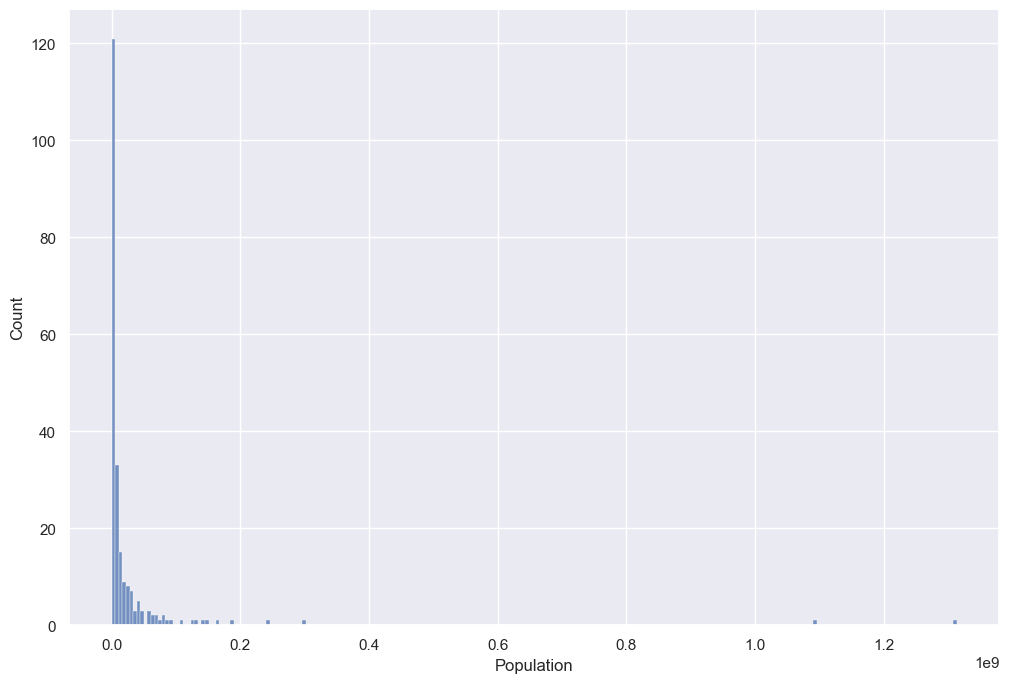

In [8]:
plt.figure(figsize=(12,8))
sns.histplot(data=df, x='Population')

<Axes: xlabel='Population', ylabel='Count'>

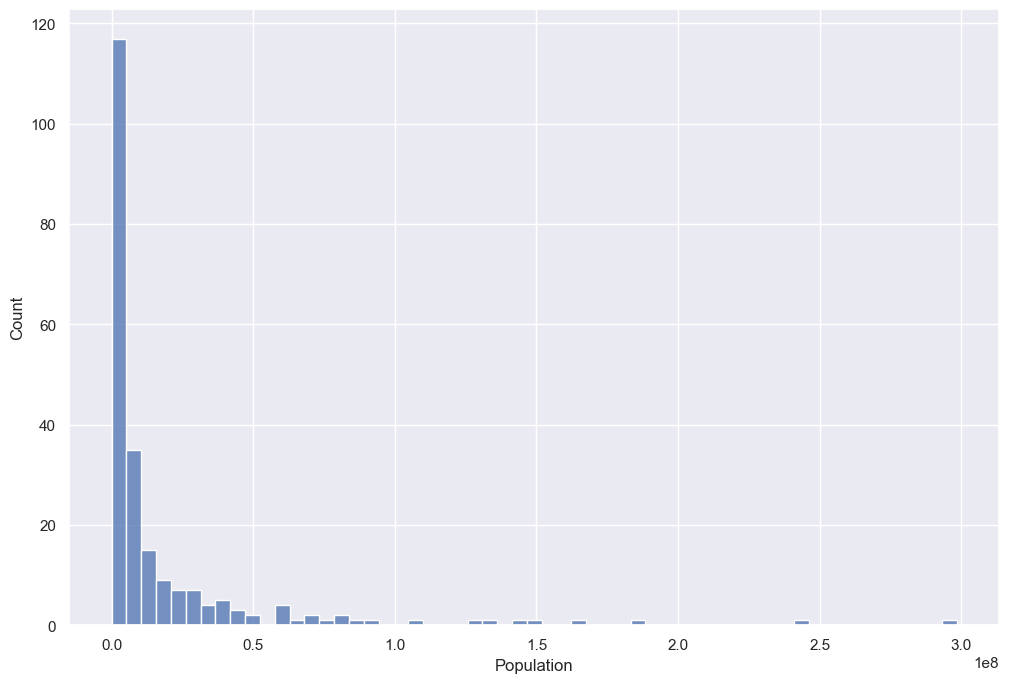

In [9]:
plt.figure(figsize=(12,8))
filter = df['Population'] < 1000000000
sns.histplot(data=df[filter], x='Population')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'WESTERN EUROPE                     '),
  Text(1, 0, 'NORTHERN AMERICA                   '),
  Text(2, 0, 'LATIN AMER. & CARIB    '),
  Text(3, 0, 'OCEANIA                            '),
  Text(4, 0, 'ASIA (EX. NEAR EAST)         '),
  Text(5, 0, 'NEAR EAST                          '),
  Text(6, 0, 'EASTERN EUROPE                     '),
  Text(7, 0, 'BALTICS                            '),
  Text(8, 0, 'SUB-SAHARAN AFRICA                 '),
  Text(9, 0, 'C.W. OF IND. STATES '),
  Text(10, 0, 'NORTHERN AFRICA                    ')])

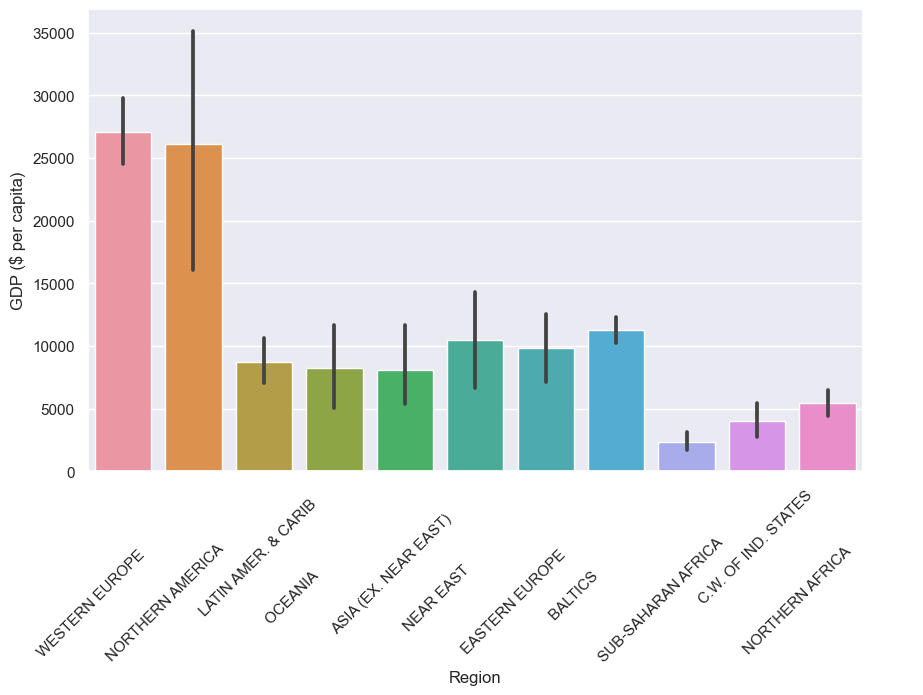

In [10]:
plt.figure(figsize=(10,6))
sns.barplot(data=df.sort_values('GDP ($ per capita)', ascending=False), x='Region', y='GDP ($ per capita)')
plt.xticks(rotation=45)

<Axes: xlabel='GDP ($ per capita)', ylabel='Phones (per 1000)'>

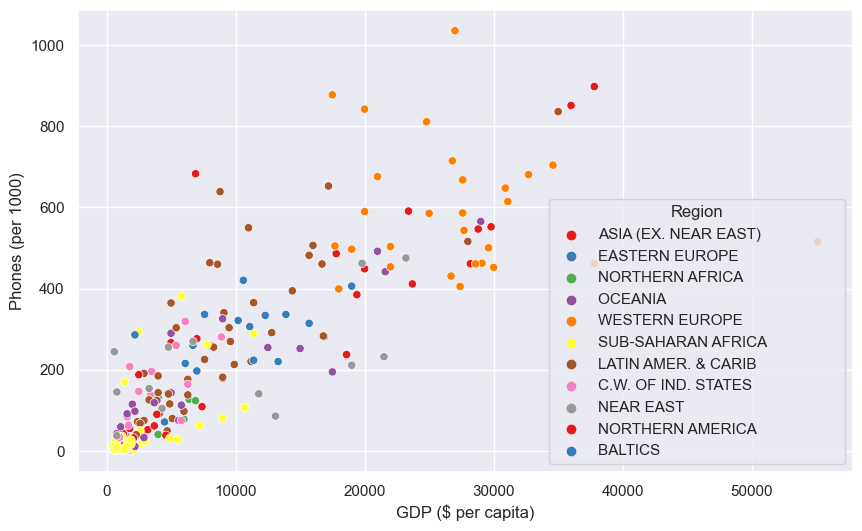

In [11]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='GDP ($ per capita)', y ='Phones (per 1000)', hue='Region', palette='Set1')

<Axes: xlabel='GDP ($ per capita)', ylabel='Literacy (%)'>

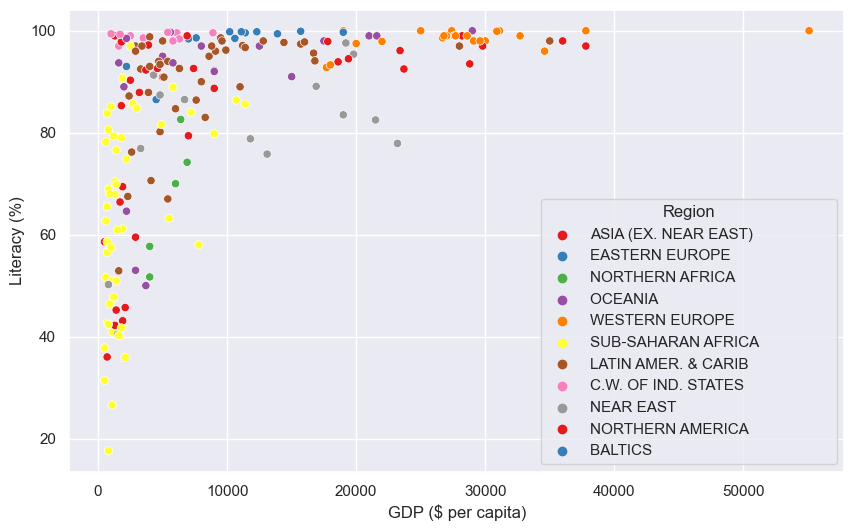

In [12]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='GDP ($ per capita)', y ='Literacy (%)', hue='Region', palette='Set1')

C:\Users\migue\AppData\Local\Temp\ipykernel_4836\2577348532.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr().round(2), cmap='viridis', annot=True)


<Axes: >

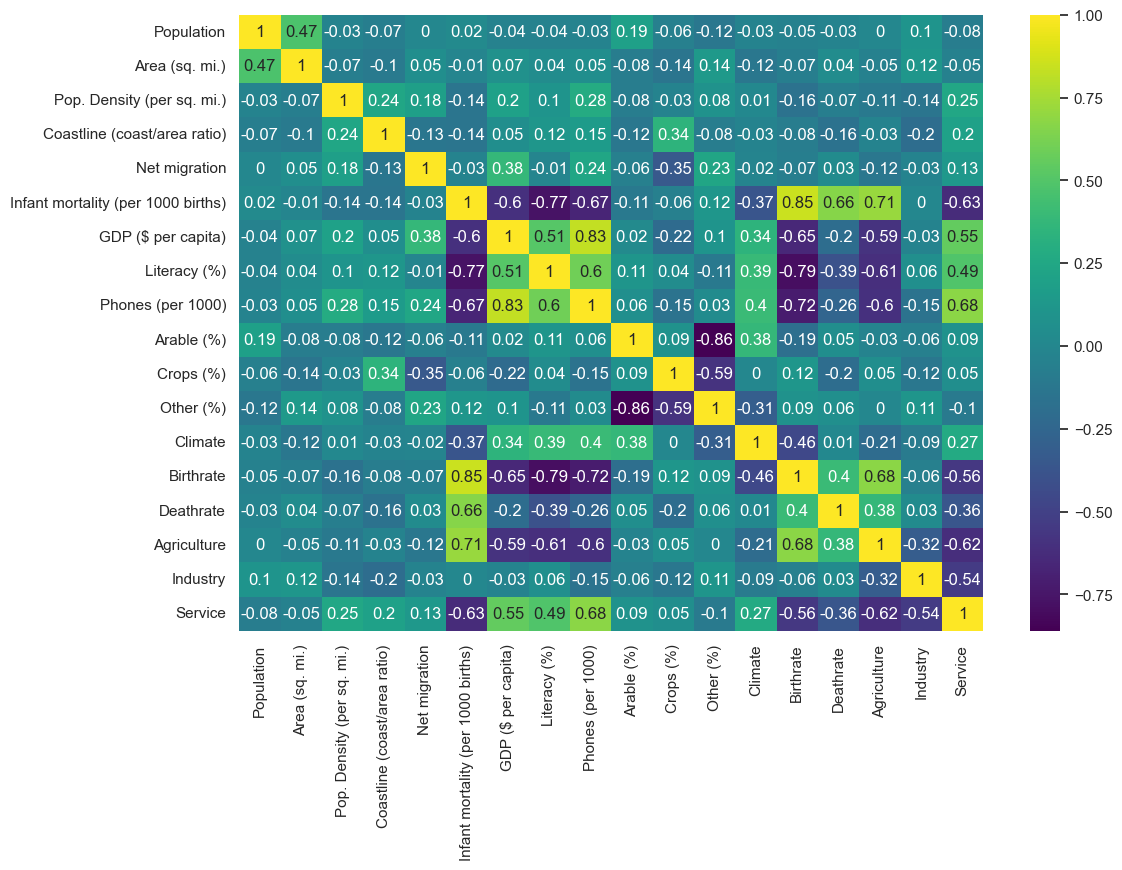

In [13]:
plt.figure(figsize=(12,8), dpi=100)
sns.heatmap(df.corr().round(2), cmap='viridis', annot=True)

C:\Users\migue\AppData\Local\Temp\ipykernel_4836\3600961638.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.clustermap(df.corr().round(2), cmap='viridis', annot=True)


<Figure size 4000x3000 with 0 Axes>

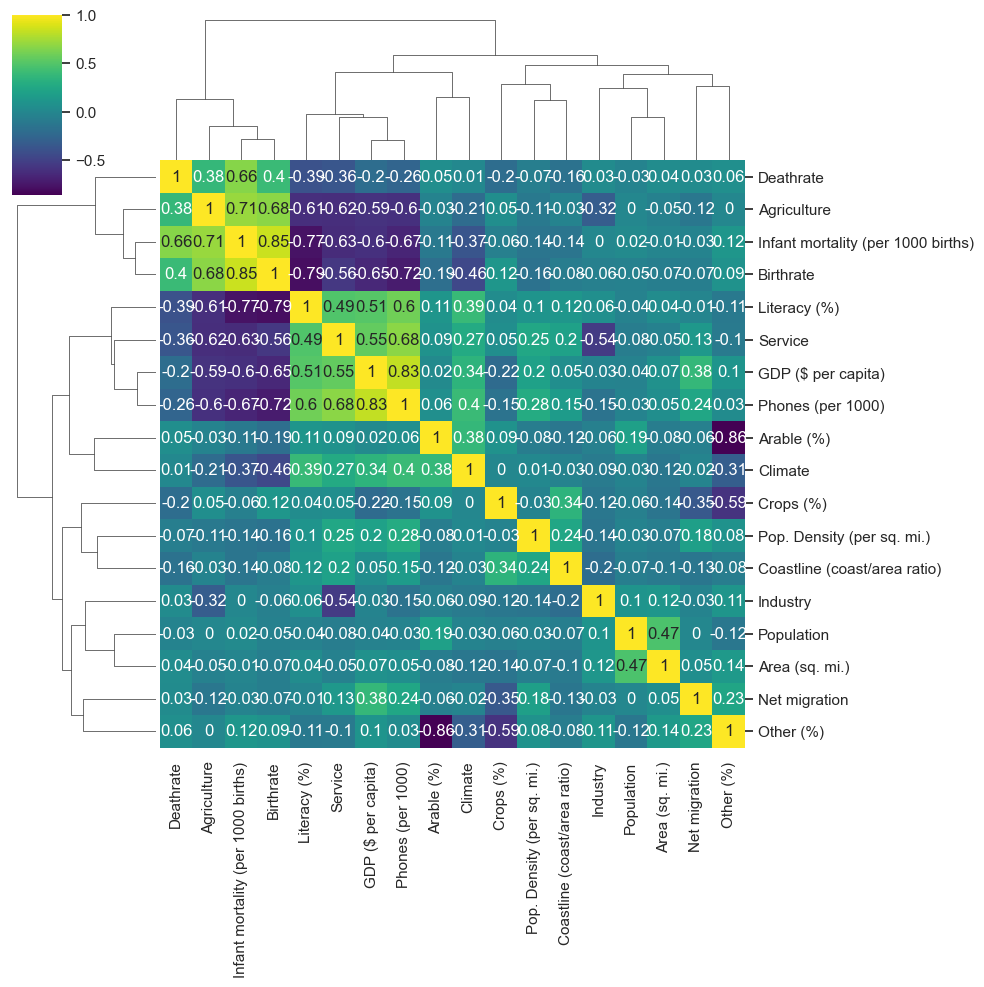

In [14]:
"""
El método clustermap() utiliza agrupación jerárquica para ordenar los datos por similitud, sin necesidad de especificar un número concreto de clústers. Reorganiza los datos de las filas y columnas y muestra el contenido similar uno al lado de otro para una comprensión más profunda.
"""
plt.figure(figsize=(20,15), dpi=200)
sns.clustermap(df.corr().round(2), cmap='viridis', annot=True)

## Data preparation

### Valores faltantes

In [15]:
df.isnull().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64

In [16]:
filter = df['Agriculture'].isnull()
df[filter]['Country']

3            American Samoa
4                   Andorra
78                Gibraltar
80                Greenland
83                     Guam
134                 Mayotte
140              Montserrat
144                   Nauru
153      N. Mariana Islands
171            Saint Helena
174    St Pierre & Miquelon
177              San Marino
208       Turks & Caicos Is
221       Wallis and Futuna
223          Western Sahara
Name: Country, dtype: object

In [17]:
df[filter] = df[filter].fillna(0)

In [18]:
df.isnull().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          1
Infant mortality (per 1000 births)     1
GDP ($ per capita)                     0
Literacy (%)                          13
Phones (per 1000)                      2
Arable (%)                             1
Crops (%)                              1
Other (%)                              1
Climate                               18
Birthrate                              1
Deathrate                              2
Agriculture                            0
Industry                               1
Service                                1
dtype: int64

In [19]:
df['Region'].unique()

array(['ASIA (EX. NEAR EAST)         ',
       'EASTERN EUROPE                     ',
       'NORTHERN AFRICA                    ',
       'OCEANIA                            ',
       'WESTERN EUROPE                     ',
       'SUB-SAHARAN AFRICA                 ', 'LATIN AMER. & CARIB    ',
       'C.W. OF IND. STATES ', 'NEAR EAST                          ',
       'NORTHERN AMERICA                   ',
       'BALTICS                            '], dtype=object)

In [20]:
climate_mean = df.groupby('Region')['Climate'].transform('mean')
climate_mean

0      1.962963
1      3.111111
2      1.500000
3      2.000000
4      2.826087
         ...   
222    1.666667
223    1.500000
224    1.666667
225    1.846939
226    1.846939
Name: Climate, Length: 227, dtype: float64

In [21]:
df['Climate'] = df['Climate'].fillna(climate_mean)

In [22]:
df.isnull().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          1
Infant mortality (per 1000 births)     1
GDP ($ per capita)                     0
Literacy (%)                          13
Phones (per 1000)                      2
Arable (%)                             1
Crops (%)                              1
Other (%)                              1
Climate                                0
Birthrate                              1
Deathrate                              2
Agriculture                            0
Industry                               1
Service                                1
dtype: int64

In [23]:
df['Literacy (%)'] = df.groupby('Region')['Literacy (%)'].transform('mean')

In [24]:
df.isnull().sum()

Country                               0
Region                                0
Population                            0
Area (sq. mi.)                        0
Pop. Density (per sq. mi.)            0
Coastline (coast/area ratio)          0
Net migration                         1
Infant mortality (per 1000 births)    1
GDP ($ per capita)                    0
Literacy (%)                          0
Phones (per 1000)                     2
Arable (%)                            1
Crops (%)                             1
Other (%)                             1
Climate                               0
Birthrate                             1
Deathrate                             2
Agriculture                           0
Industry                              1
Service                               1
dtype: int64

In [25]:
# Intentar imputar los valores en lugar de borrarlos
df.dropna(inplace=True)

In [26]:
df.isnull().sum()

Country                               0
Region                                0
Population                            0
Area (sq. mi.)                        0
Pop. Density (per sq. mi.)            0
Coastline (coast/area ratio)          0
Net migration                         0
Infant mortality (per 1000 births)    0
GDP ($ per capita)                    0
Literacy (%)                          0
Phones (per 1000)                     0
Arable (%)                            0
Crops (%)                             0
Other (%)                             0
Climate                               0
Birthrate                             0
Deathrate                             0
Agriculture                           0
Industry                              0
Service                               0
dtype: int64

### Obtención X

In [27]:
X = pd.get_dummies(df.drop('Country', axis=1))
X

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),...,Region_BALTICS,Region_C.W. OF IND. STATES,Region_EASTERN EUROPE,Region_LATIN AMER. & CARIB,Region_NEAR EAST,Region_NORTHERN AFRICA,Region_NORTHERN AMERICA,Region_OCEANIA,Region_SUB-SAHARAN AFRICA,Region_WESTERN EUROPE
0,31056997,647500,48.0,0.00,23.06,163.07,700.0,79.553571,3.2,12.13,...,0,0,0,0,0,0,0,0,0,0
1,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,97.088889,71.2,21.09,...,0,0,1,0,0,0,0,0,0,0
2,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,56.033333,78.1,3.22,...,0,0,0,0,0,1,0,0,0,0
3,57794,199,290.4,58.29,-20.71,9.27,8000.0,83.900000,259.5,10.00,...,0,0,0,0,0,0,0,1,0,0
4,71201,468,152.1,0.00,6.60,4.05,19000.0,94.291667,497.2,2.22,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,2460492,5860,419.9,0.00,2.98,19.62,800.0,79.521429,145.2,16.90,...,0,0,0,0,1,0,0,0,0,0
223,273008,266000,1.0,0.42,0.00,0.00,0.0,56.033333,0.0,0.02,...,0,0,0,0,0,1,0,0,0,0
224,21456188,527970,40.6,0.36,0.00,61.50,800.0,79.521429,37.2,2.78,...,0,0,0,0,1,0,0,0,0,0
225,11502010,752614,15.3,0.00,0.00,88.29,800.0,61.284314,8.2,7.08,...,0,0,0,0,0,0,0,0,1,0


### Escalado

In [28]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# scaler = StandardScaler()
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

## Clustering: Kmeans

1. Método del codo
2. Coeficientes de siluetas

In [29]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

visualizer = KElbowVisualizer(KMeans(), k=(2, 15))
visualizer.fit(X_scaled)
visualizer.show()

ModuleNotFoundError: No module named 'yellowbrick'

<AxesSubplot:>

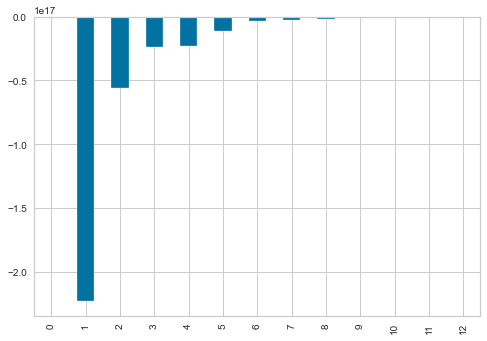

In [ ]:
wcss = []

for i in range(2, 15):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

pd.Series(wcss).diff().plot(kind='bar')

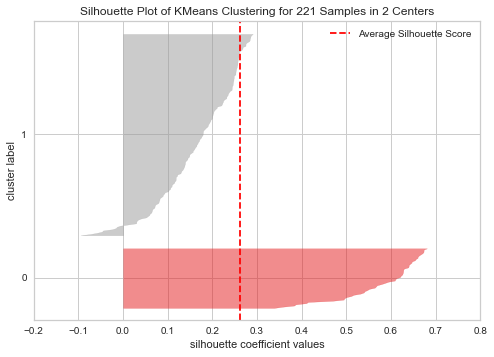

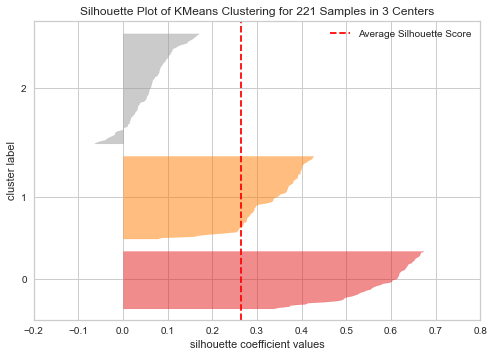

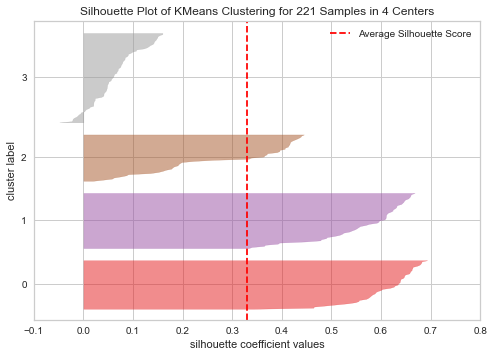

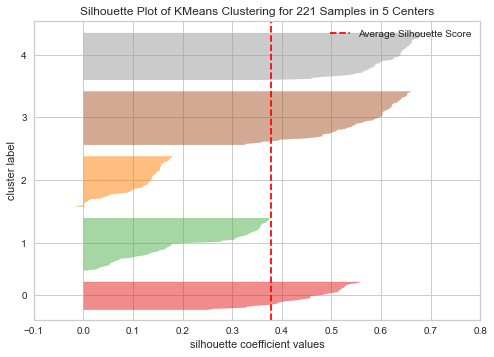

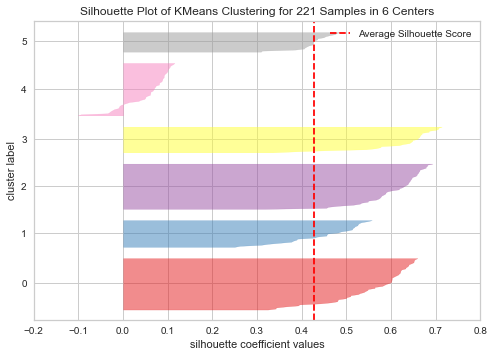

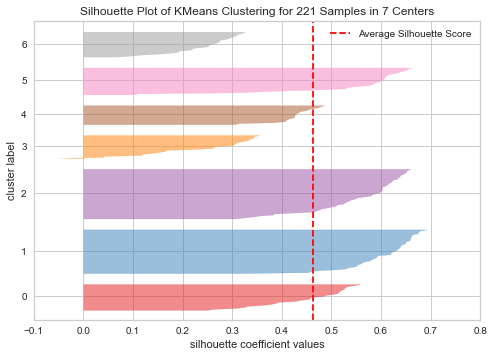

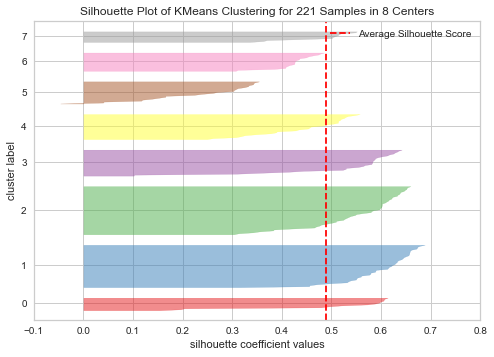

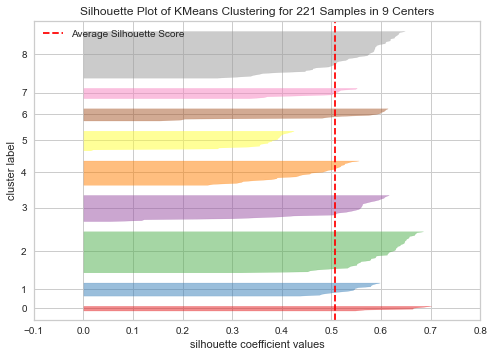

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

for i in range(2,10):
    visualizer = SilhouetteVisualizer(KMeans(n_clusters=i), color='sns_bright')
    visualizer.fit(X_scaled)
    # visualizer.fit(X)
    visualizer.show()

In [ ]:
model = KMeans(3)
model.fit(X_scaled)
X_cluster = X.copy()
X_cluster['cluster'] = model.labels_

In [ ]:
X_cluster.head()

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),...,Region_C.W. OF IND. STATES,Region_EASTERN EUROPE,Region_LATIN AMER. & CARIB,Region_NEAR EAST,Region_NORTHERN AFRICA,Region_NORTHERN AMERICA,Region_OCEANIA,Region_SUB-SAHARAN AFRICA,Region_WESTERN EUROPE,cluster
0,31056997,647500,48.0,0.00,23.06,163.07,700.0,79.553571,3.2,12.13,...,0,0,0,0,0,0,0,0,0,1
1,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,97.088889,71.2,21.09,...,0,1,0,0,0,0,0,0,0,1
2,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,56.033333,78.1,3.22,...,0,0,0,0,1,0,0,0,0,1
3,57794,199,290.4,58.29,-20.71,9.27,8000.0,83.900000,259.5,10.00,...,0,0,0,0,0,0,1,0,0,1
4,71201,468,152.1,0.00,6.60,4.05,19000.0,94.291667,497.2,2.22,...,0,0,0,0,0,0,0,0,1,2


In [ ]:
X_cluster.corr()['cluster'].sort_values()

Region_SUB-SAHARAN AFRICA                    -0.833484
Birthrate                                    -0.697155
Infant mortality (per 1000 births)           -0.676551
Agriculture                                  -0.503888
Deathrate                                    -0.466521
Industry                                     -0.043141
Other (%)                                    -0.042869
Crops (%)                                    -0.035776
Area (sq. mi.)                                0.013270
Region_BALTICS                                0.020736
Region_NORTHERN AFRICA                        0.029529
Population                                    0.040198
Region_EASTERN EUROPE                         0.040456
Region_C.W. OF IND. STATES                    0.042356
Region_NEAR EAST                              0.047699
Region_OCEANIA                                0.055759
Region_ASIA (EX. NEAR EAST)                   0.065945
Pop. Density (per sq. mi.)                    0.078843
Region_LAT

<AxesSubplot:>

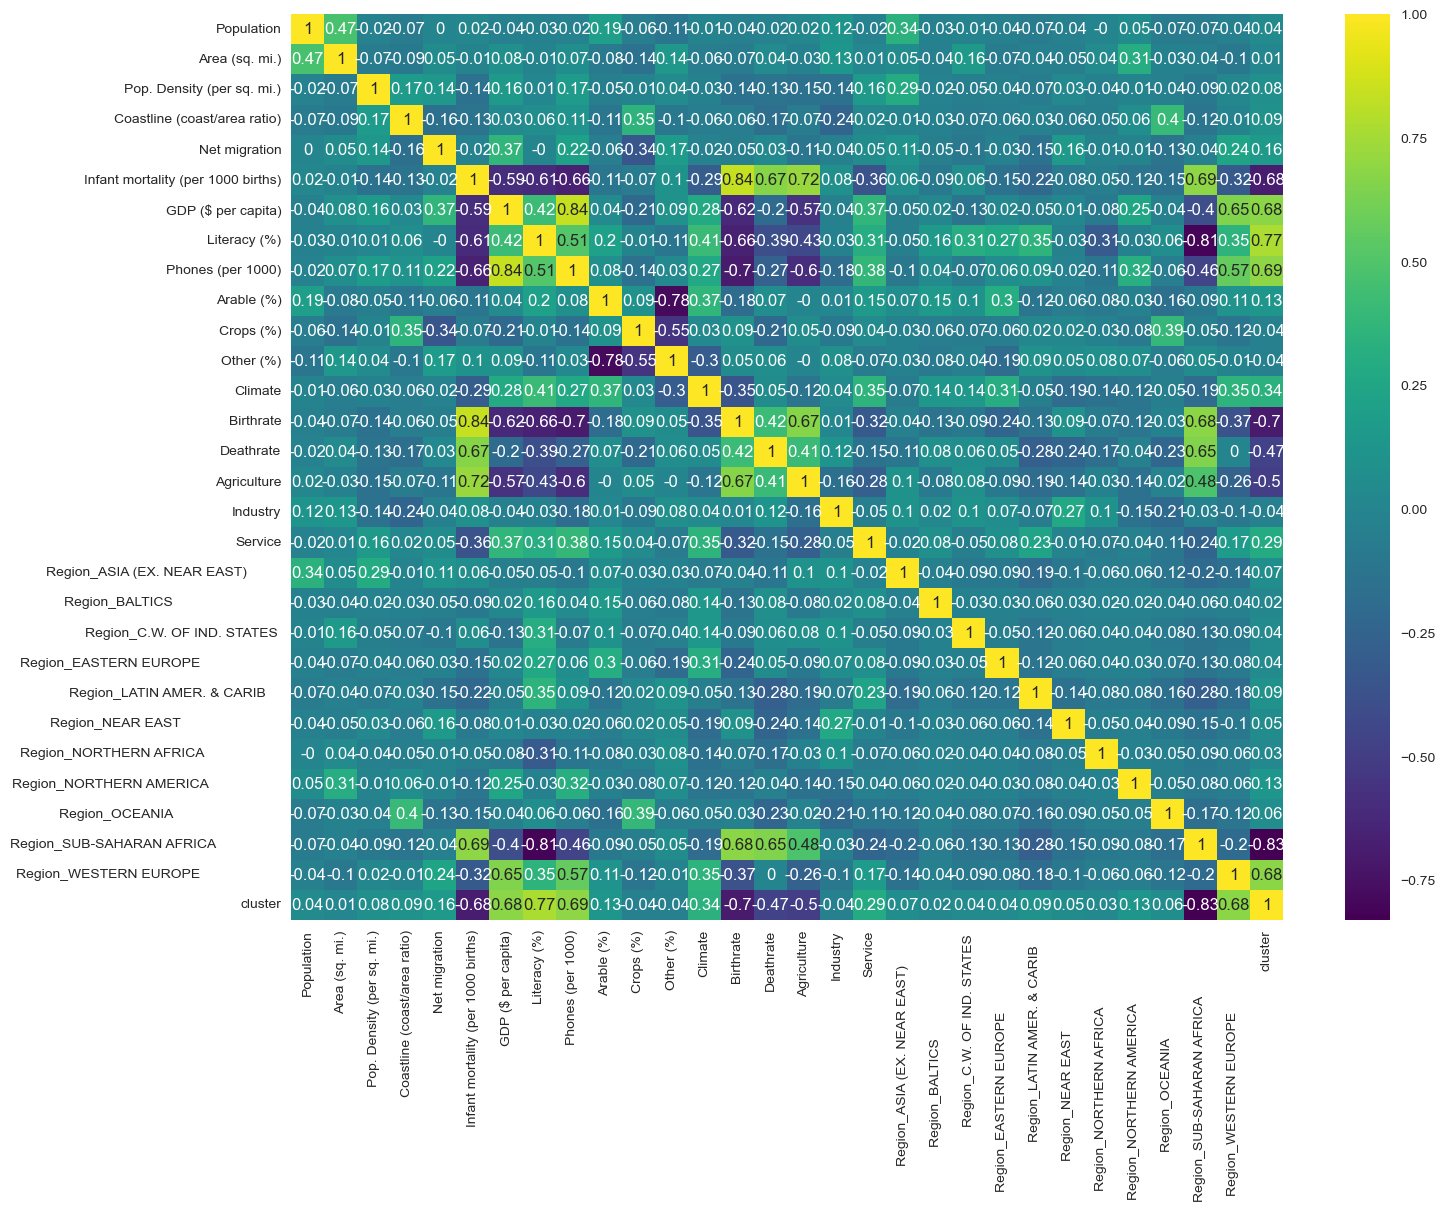

In [ ]:
plt.figure(figsize=(16,12), dpi=100)
sns.heatmap(X_cluster.corr().round(2), cmap='viridis', annot=True)

<AxesSubplot:xlabel='cluster', ylabel='count'>

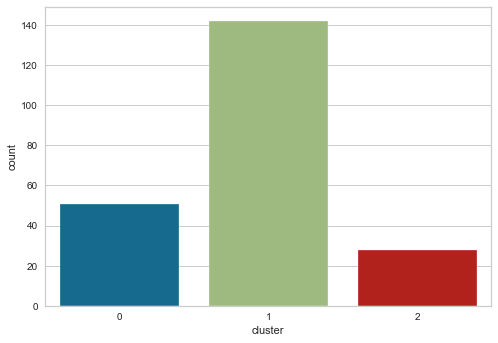

In [ ]:
sns.countplot(data=X_cluster, x='cluster')

In [ ]:
import plotly.express as px
px.histogram(X_cluster, x='cluster', color='cluster')

## Visualización resultados

Buscar códigos ISO de países para utilizarlos en la visualización de los clusters sobre un mapa del mundo

Alternativa dataset: https://www.kaggle.com/datasets/juanumusic/countries-iso-codes

In [ ]:
df_iso = pd.read_csv("../data/countries_iso.csv")
df_iso.head(20)

,Country,ISO Code
0,Afghanistan,AFG
1,"Akrotiri and Dhekelia – See United Kingdom, The","Akrotiri and Dhekelia – See United Kingdom, The"
2,Åland Islands,ALA
3,Albania,ALB
4,Algeria,DZA
5,American Samoa,ASM
6,Andorra,AND
7,Angola,AGO
8,Anguilla,AIA
9,Antarctica [a],ATA


In [ ]:
df_iso.shape

(301, 2)

In [ ]:
iso_codes = df_iso.set_index('Country')['ISO Code'].to_dict()
iso_codes

{'Afghanistan': 'AFG',
 'Akrotiri and Dhekelia – See United Kingdom, The': 'Akrotiri and Dhekelia – See United Kingdom, The',
 'Åland Islands': 'ALA',
 'Albania': 'ALB',
 'Algeria': 'DZA',
 'American Samoa': 'ASM',
 'Andorra': 'AND',
 'Angola': 'AGO',
 'Anguilla': 'AIA',
 'Antarctica\u200a[a]': 'ATA',
 'Antigua and Barbuda': 'ATG',
 'Argentina': 'ARG',
 'Armenia': 'ARM',
 'Aruba': 'ABW',
 'Ashmore and Cartier Islands – See Australia.': 'Ashmore and Cartier Islands – See Australia.',
 'Australia\u200a[b]': 'AUS',
 'Austria': 'AUT',
 'Azerbaijan': 'AZE',
 'Bahamas (the)': 'BHS',
 'Bahrain': 'BHR',
 'Bangladesh': 'BGD',
 'Barbados': 'BRB',
 'Belarus': 'BLR',
 'Belgium': 'BEL',
 'Belize': 'BLZ',
 'Benin': 'BEN',
 'Bermuda': 'BMU',
 'Bhutan': 'BTN',
 'Bolivia (Plurinational State of)': 'BOL',
 'Bonaire\xa0Sint Eustatius\xa0Saba': 'BES',
 'Bosnia and Herzegovina': 'BIH',
 'Botswana': 'BWA',
 'Bouvet Island': 'BVT',
 'Brazil': 'BRA',
 'British Indian Ocean Territory (the)': 'IOT',
 'British V

In [ ]:
df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,79.553571,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,97.088889,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,56.033333,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,83.900000,259.5,10.00,15.00,75.00,2.0,22.46,3.27,0.000,0.000,0.000
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,94.291667,497.2,2.22,0.00,97.78,3.0,8.71,6.25,0.000,0.000,0.000


In [ ]:
df.shape

(221, 20)

In [ ]:
# Mapeo/transformación de Country (texto) a ISO Code (texto)
df['iso'] = df['Country'].map(iso_codes)

In [ ]:
df['cluster'] = X_cluster['cluster']

In [ ]:
df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),...,Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service,iso,cluster
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,79.553571,...,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380,AFG,1
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,97.088889,...,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579,ALB,1
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,56.033333,...,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298,DZA,1
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,83.900000,...,15.00,75.00,2.0,22.46,3.27,0.000,0.000,0.000,ASM,1
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,94.291667,...,0.00,97.78,3.0,8.71,6.25,0.000,0.000,0.000,AND,2


In [ ]:
px.choropleth(df, locations='iso', color='cluster', hover_name='Country')